In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

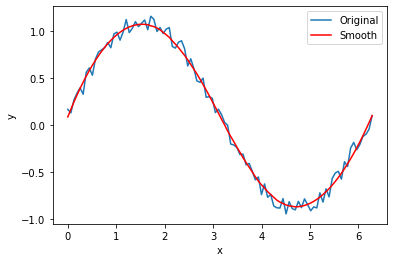

In [2]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

plt.plot(x,y, label = 'Original')
plt.plot(x,yhat, label = 'Smooth', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

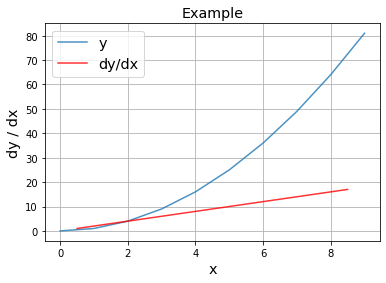

In [3]:
x = np.arange(10)
y = x**2
dydx = np.diff(y)/np.diff(x)

# Plot the curve
plt.plot(x, y, label = 'y', alpha = 0.8)
plt.plot(x[1:]-0.5*(x[1]-x[0]), dydx, label = 'dy/dx', alpha = 0.8, color='r')

plt.title('Example', fontsize= 'x-large')
plt.xlabel('x', fontsize = "x-large")
plt.ylabel('dy / dx', fontsize = "x-large")
plt.grid()
plt.legend(fontsize= 'x-large')
plt.show();

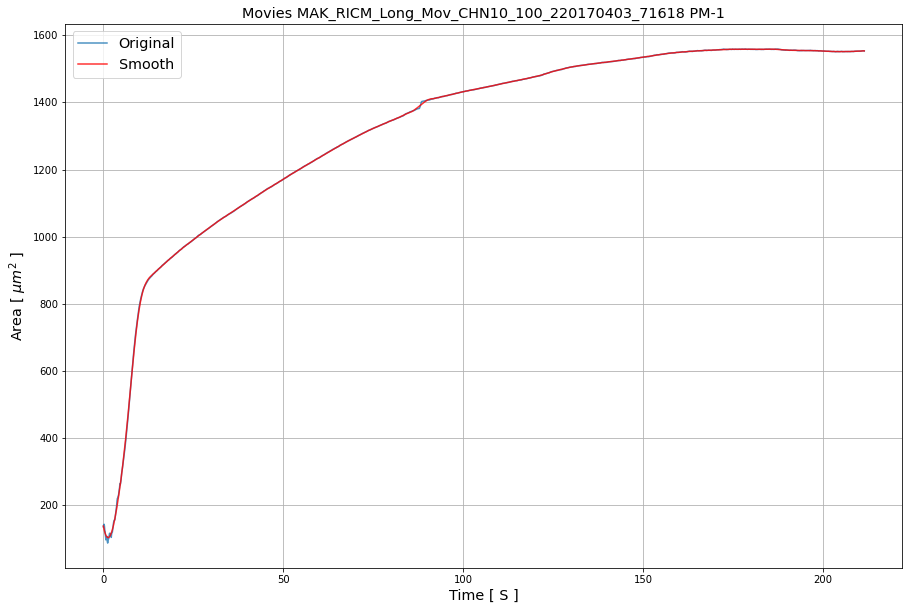

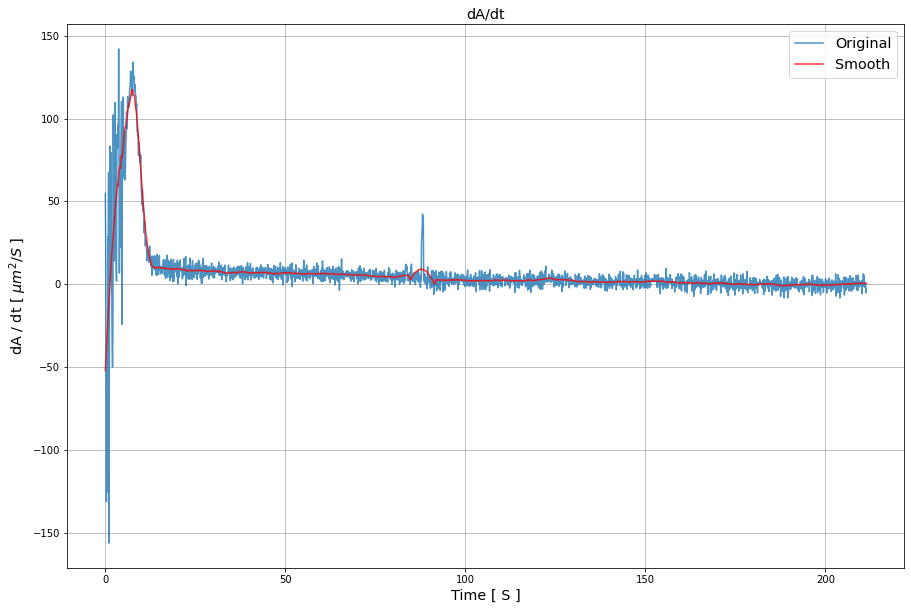

In [7]:
experiment = 'Movies'
DF = 'MAK_RICM_Long_Mov_CHN10_100_220170403_71618 PM-1.csv'
df = pd.read_csv('{}/results/{}'.format(experiment,DF))

dAdt= np.diff(df['Area'])/np.diff(df['Time'])

# Smooth the area curve
smooth_area = savgol_filter(df['Area'], 71, 3)
dAdt_smooth = np.diff(smooth_area)/np.diff(df['Time'])

# Plot the curve
plt.figure(figsize=(15,10))

plt.plot(df['Time'], df['Area'], label = 'Original', alpha = 0.8)
plt.plot(df['Time'], smooth_area, label = 'Smooth', alpha = 0.8, color = 'r')

plt.title('{} {}'.format(experiment, DF.split(sep='.')[0]), fontsize= 'x-large')
plt.xlabel('Time [ S ]', fontsize = "x-large")
plt.ylabel('Area [ $\mu m^2$ ]', fontsize = "x-large")
#plt.ylim(-1,df['Area'].max() + df['Area'].max()/10)
plt.grid()
plt.legend(fontsize = "x-large")
plt.savefig('calculus/{}_{}_curve.pdf'.format(experiment, DF.split(sep='.')[0]))
plt.show();

# Plot the derivative
plt.figure(figsize=(15,10))

plt.plot(df['Time'][1:]-0.5*(df['Time'][1]-df['Time'][0]), dAdt, label = 'Original', alpha = 0.8)
plt.plot(df['Time'][1:]-0.5*(df['Time'][1]-df['Time'][0]), dAdt_smooth, label = 'Smooth', alpha = 0.8, color = 'r')

plt.title('dA/dt', fontsize= 'x-large')
plt.xlabel('Time [ S ]', fontsize = "x-large")
plt.ylabel('dA / dt [ $\mu m^2 / S$ ]', fontsize = "x-large")
#plt.ylim(-1,1)
plt.grid()
plt.legend(fontsize = "x-large")
plt.savefig('calculus/{}_{}_derivative.pdf'.format(experiment, DF.split(sep='.')[0]))
plt.show();

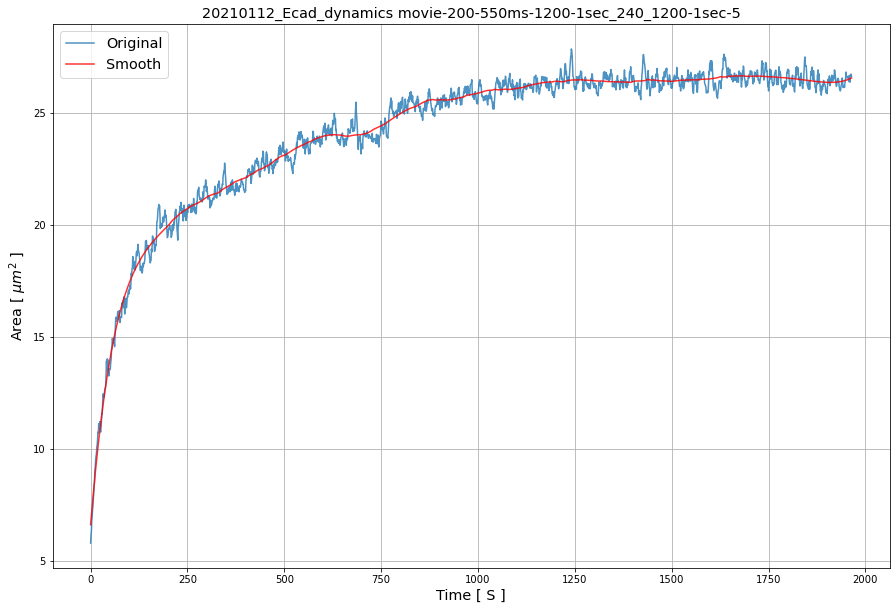

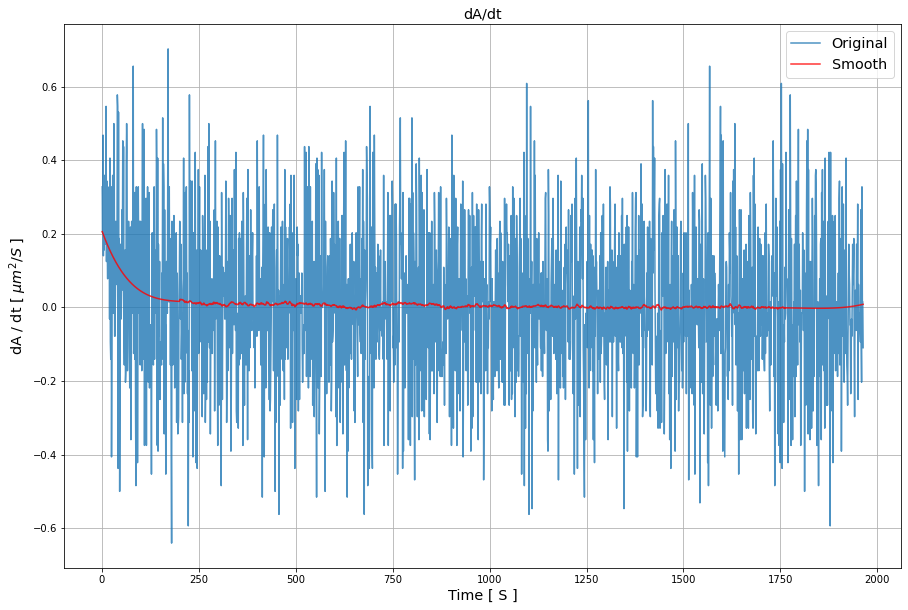

In [8]:
experiment = '20210112_Ecad_dynamics'
DF = 'movie-200-550ms-1200-1sec_240_1200-1sec-5.csv'
df = pd.read_csv('{}/results/{}'.format(experiment,DF))

# Take the derivative
dAdt= np.diff(df['Area'])/np.diff(df['Time'])

# Smooth the area curve
smooth_area = savgol_filter(df['Area'], 401, 5)
dAdt_smooth = np.diff(smooth_area)/np.diff(df['Time'])

# Plot the curve
plt.figure(figsize=(15,10))

plt.plot(df['Time'], df['Area'], label = 'Original', alpha = 0.8)
plt.plot(df['Time'], smooth_area, label = 'Smooth', alpha = 0.8, color = 'r')

plt.title('{} {}'.format(experiment, DF.split(sep='.')[0]), fontsize= 'x-large')
plt.xlabel('Time [ S ]', fontsize = "x-large")
plt.ylabel('Area [ $\mu m^2$ ]', fontsize = "x-large")
#plt.ylim(-1,df['Area'].max() + df['Area'].max()/10)
plt.grid()
plt.legend(fontsize = "x-large")
plt.savefig('calculus/{}_{}_curve.pdf'.format(experiment, DF.split(sep='.')[0]))
plt.show();

# Plot the derivative
plt.figure(figsize=(15,10))

plt.plot(df['Time'][1:]-0.5*(df['Time'][1]-df['Time'][0]), dAdt, label = 'Original', alpha = 0.8)
plt.plot(df['Time'][1:]-0.5*(df['Time'][1]-df['Time'][0]), dAdt_smooth, label = 'Smooth', alpha = 0.8, color = 'r')

plt.title('dA/dt', fontsize= 'x-large')
plt.xlabel('Time [ S ]', fontsize = "x-large")
plt.ylabel('dA / dt [ $\mu m^2 / S$ ]', fontsize = "x-large")
#plt.ylim(-1,1)
plt.grid()
plt.legend(fontsize = "x-large")
plt.savefig('calculus/{}_{}_derivative.pdf'.format(experiment, DF.split(sep='.')[0]))
plt.show();

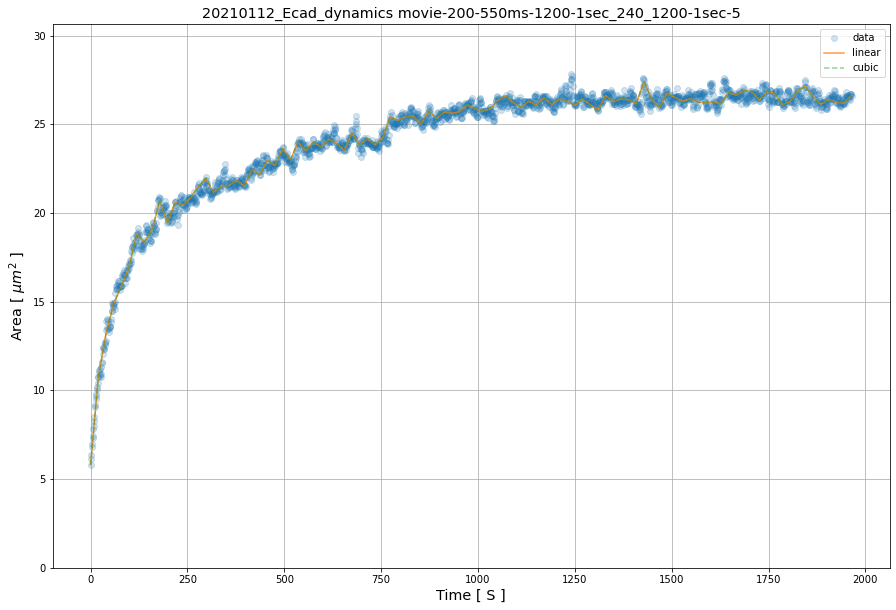

In [7]:
from scipy.interpolate import interp1d
f = interp1d(df['Time'], df['Area'])
f2 = interp1d(df['Time'], df['Area'], kind='cubic')
xnew = np.linspace(0, df['Time'].shape[0]-1, num=100, endpoint=True)

#plt.plot(df['Time'], df['Area'], 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.figure(figsize=(15,10))

plt.plot(df['Time'], df['Area'], 'o', label = 'data', alpha = 0.2)
plt.plot(xnew, f(xnew), '-', label = 'linear', alpha = 0.8)
plt.plot(xnew, f2(xnew), '--', label = 'cubic', alpha = 0.5)

plt.title('{} {}'.format(experiment, DF.split(sep='.')[0]), fontsize= 'x-large')
plt.xlabel('Time [ S ]', fontsize = "x-large")
plt.ylabel('Area [ $\mu m^2$ ]', fontsize = "x-large")
plt.ylim(0,df['Area'].max() + df['Area'].max()/10)
plt.grid()
plt.legend()
plt.show();

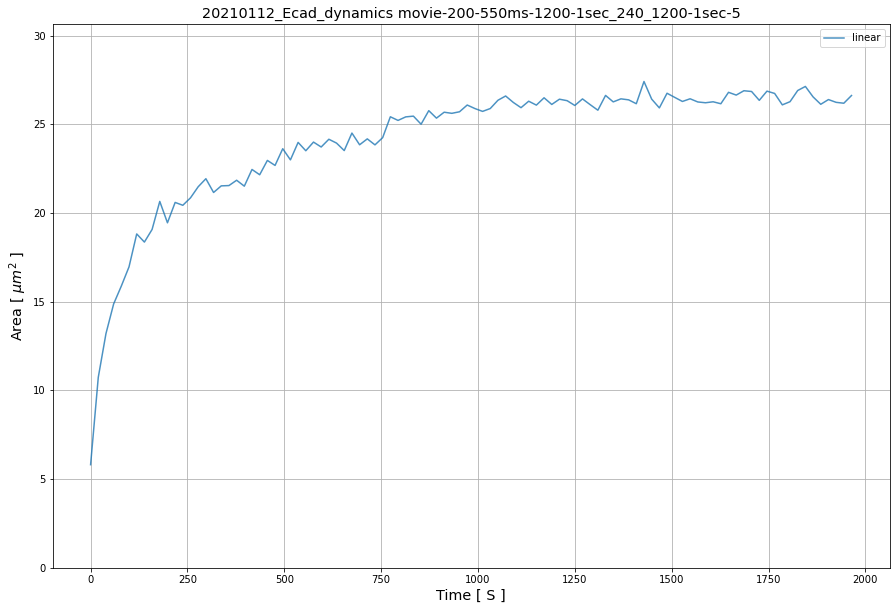

In [38]:
#plt.plot(df['Time'], df['Area'], 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.figure(figsize=(15,10))

#plt.plot(df['Time'], df['Area'], 'o', label = 'data', alpha = 0.2)
plt.plot(xnew, f(xnew), '-', label = 'linear', alpha = 0.8)
#plt.plot(xnew, f2(xnew), '--', label = 'cubic', alpha = 0.5)

plt.title('{} {}'.format(experiment, DF.split(sep='.')[0]), fontsize= 'x-large')
plt.xlabel('Time [ S ]', fontsize = "x-large")
plt.ylabel('Area [ $\mu m^2$ ]', fontsize = "x-large")
plt.ylim(0,df['Area'].max() + df['Area'].max()/10)
plt.grid()
plt.legend()
plt.show();

In [39]:
dAdt= np.diff(xnew)/np.diff(f(xnew))

# Plot the curve
plt.figure(figsize=(15,10))
plt.plot(xnew[:-1], dAdt, label = '{}_{}'.format(experiment, DF), alpha = 0.8)
plt.title('{} {}'.format(experiment, DF.split(sep='.')[0]), fontsize= 'x-large')
plt.xlabel('Time [ S ]', fontsize = "x-large")
plt.ylabel('dA / dt [ $\mu m^2 / S$ ]', fontsize = "x-large")
#plt.ylim(0,df['Area'].max() + df['Area'].max()/10)
plt.grid()
plt.savefig("data_pdf/{}_{}_FromZero.pdf".format(experiment, DF.split(sep='.')[0]))
plt.show();

NameError: name 'xnew' is not defined

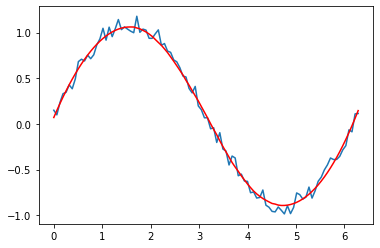